In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


TOPO="topo0"
SCHED="rtt"
REP=1


In [136]:
downloads = pd.DataFrame()
for i in range(0,REP):
    d = pd.read_csv("./{topo}-{sched}/download-{i}.csv".format(topo=TOPO, sched=SCHED, i=i))
    d["i"] = i
    downloads = pd.concat([downloads, d])

downloads["mbps"] = downloads["recv_bytes"] * 8 / (1024)/ downloads["elapsed"]


<AxesSubplot: xlabel='i'>

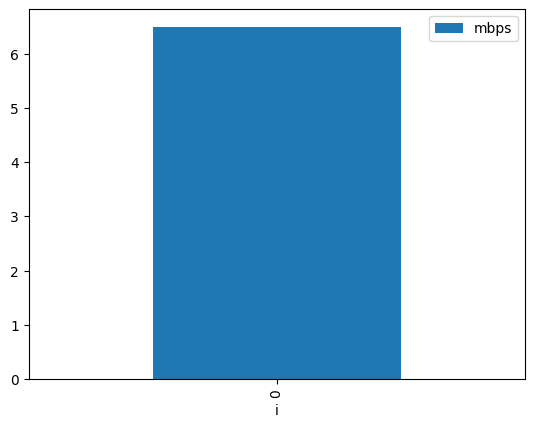

In [137]:
downloads.plot.bar(x="i", y = "mbps")

In [138]:
stats = pd.read_csv("./{}-{}/path-0.csv".format(TOPO, SCHED))

stats.index = pd.to_timedelta(stats["elapsed"], unit="ms")
stats["sent_bits"] = stats["sent_bytes"] * 8
stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,rttvar,quantum,sent_bits
elapsed,,,,,,,,,,,
0 days 00:00:01.218000,1218,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,0,13500,13464
0 days 00:00:01.307000,1307,10.0.3.10:4433,10.0.1.1:5555,15183,1707,13500,13428,84,31,13500,121464
0 days 00:00:01.307000,1307,10.0.3.10:4433,10.0.1.1:5555,15255,1707,13500,13500,84,31,13500,122040
0 days 00:00:01.391000,1391,10.0.3.10:4433,10.0.1.1:5555,28755,1802,27000,13500,83,20,13500,230040
0 days 00:00:01.393000,1393,10.0.3.10:4433,10.0.1.1:5555,42255,1802,27000,27000,83,20,13500,338040


In [139]:
remote_addr_lte = "10.0.1.1:5555"
remote_addr_wifi = "10.0.2.1:6666"

stats["path"] = "lte"
stats.loc[stats['remote']==remote_addr_wifi, "path"] = "wifi"

In [140]:
stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,rttvar,quantum,sent_bits,path
elapsed,,,,,,,,,,,,
0 days 00:00:01.218000,1218,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,0,13500,13464,lte
0 days 00:00:01.307000,1307,10.0.3.10:4433,10.0.1.1:5555,15183,1707,13500,13428,84,31,13500,121464,lte
0 days 00:00:01.307000,1307,10.0.3.10:4433,10.0.1.1:5555,15255,1707,13500,13500,84,31,13500,122040,lte
0 days 00:00:01.391000,1391,10.0.3.10:4433,10.0.1.1:5555,28755,1802,27000,13500,83,20,13500,230040,lte
0 days 00:00:01.393000,1393,10.0.3.10:4433,10.0.1.1:5555,42255,1802,27000,27000,83,20,13500,338040,lte


## Throughput and RTT

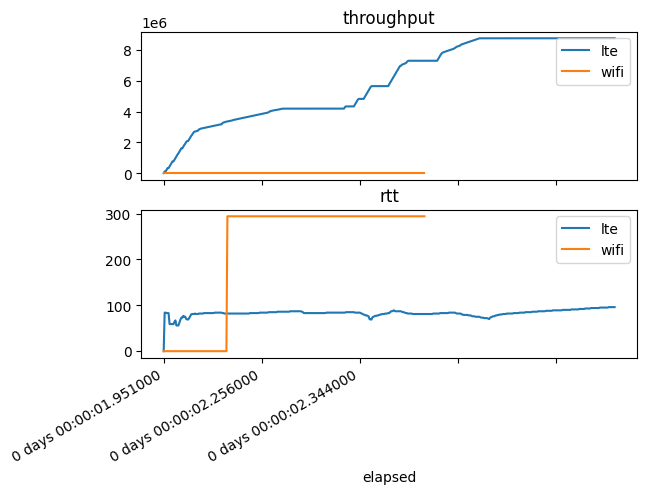

In [154]:
figure,axis =plt.subplots(2,1)


stats[stats["path"] == "lte"]["sent_bits"].plot(label="lte",ax=axis[0])
stats[stats["path"] == "wifi"]["sent_bits"].plot(label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("sent bits")

stats[stats["path"] == "lte"]["rtt"].plot(label="lte",ax=axis[1])
stats[stats["path"] == "wifi"]["rtt"].plot(label="wifi",ax=axis[1])
axis[1].set_title("rtt")
axis[1].legend()
plt.gcf().autofmt_xdate()

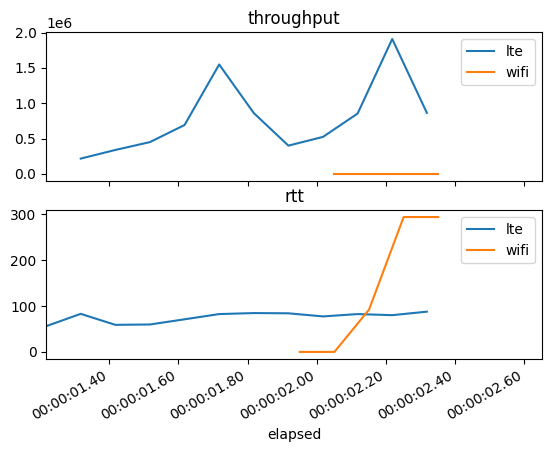

In [153]:
figure,axis =plt.subplots(2,1)


stats[stats["path"] == "lte"]["sent_bits"].resample("100ms").mean().diff().plot(label="lte",ax=axis[0])
stats[stats["path"] == "wifi"]["sent_bits"].resample("100ms").mean().diff().plot(label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("throughput")

stats[stats["path"] == "lte"]["rtt"].resample("100ms").mean().plot(label="lte",ax=axis[1])
stats[stats["path"] == "wifi"]["rtt"].resample("100ms").mean().plot(label="wifi",ax=axis[1])
axis[1].set_title("rtt")
axis[1].legend()
plt.gcf().autofmt_xdate()

Text(0.5, 1.0, 'quantum')

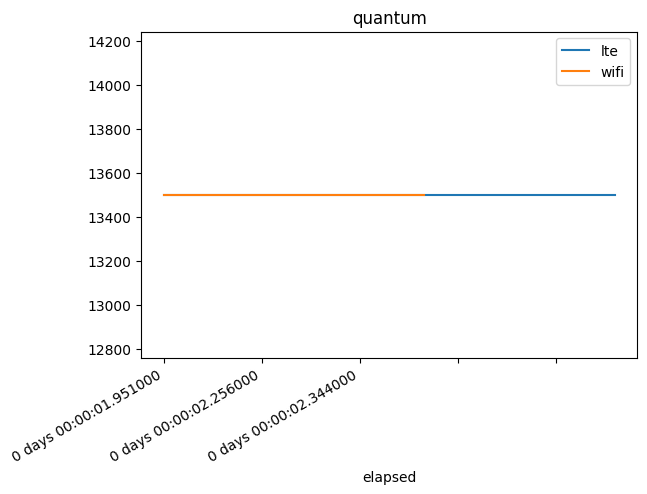

In [142]:
stats[stats["path"] == "lte"]["quantum"].plot(label="lte")
stats[stats["path"] == "wifi"]["quantum"].plot(label="wifi")
plt.legend()
plt.title("quantum")


Text(0.5, 1.0, 'RTT VAR')

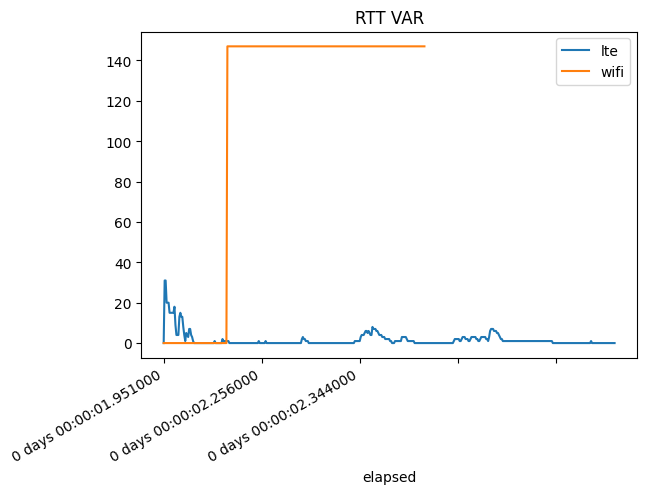

In [143]:
stats[stats["path"] == "lte"]["rttvar"].plot(label="lte")
stats[stats["path"] == "wifi"]["rttvar"].plot(label="wifi")
plt.legend()
plt.title("RTT VAR")


## CWND and BIF

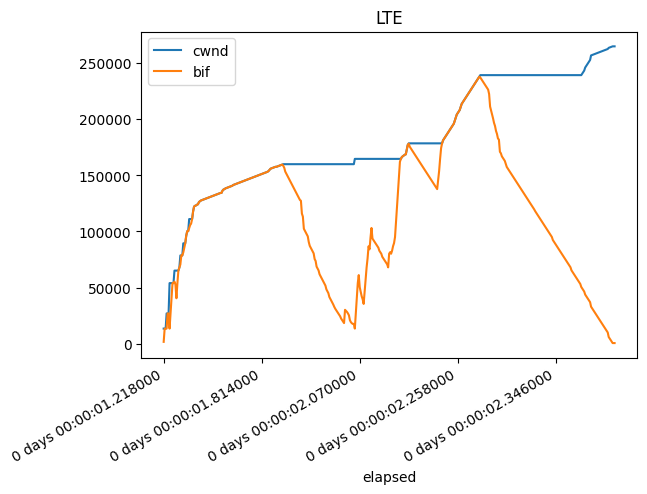

In [144]:
stats[stats["path"] == "lte"].plot(y=["cwnd","bif"])
plt.title("LTE")
plt.legend()
plt.gcf().autofmt_xdate()

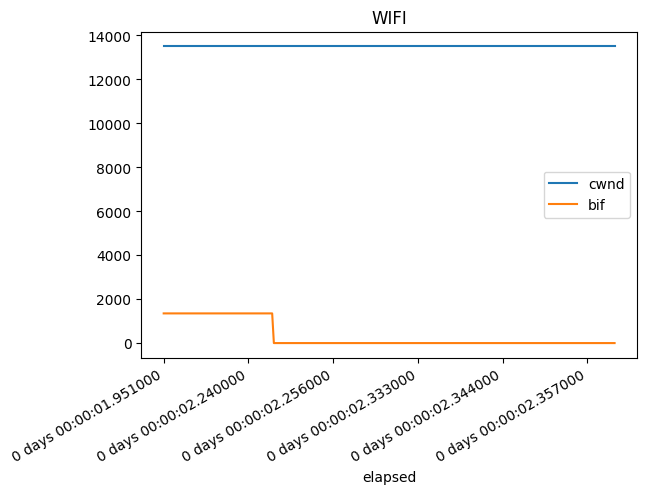

In [145]:
stats[stats["path"] == "wifi"].plot(y=["cwnd","bif"])
plt.title("WIFI")
plt.legend()



## Connection stats

In [146]:
conn = pd.read_csv("./{}-{}/conn-0.csv".format(TOPO, SCHED))

In [147]:
conn.index = pd.to_timedelta(conn["elapsed"], unit="ms")

Text(0.5, 1.0, 'Lost bytes')

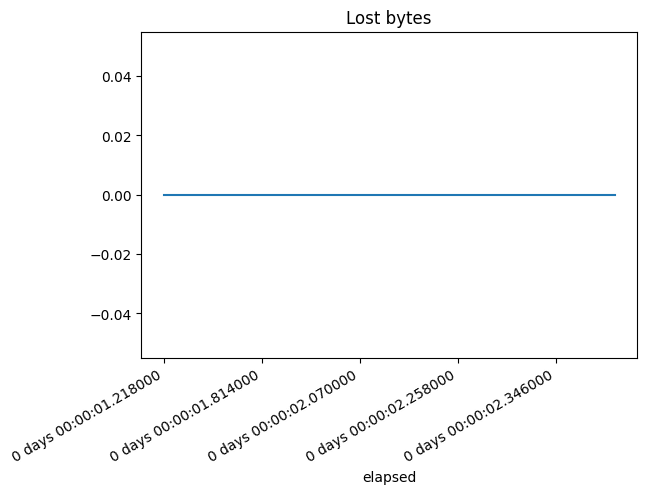

In [148]:
conn["lost_bytes_total"].plot()
plt.title("Lost bytes")


Text(0.5, 1.0, 'sent_bytes')

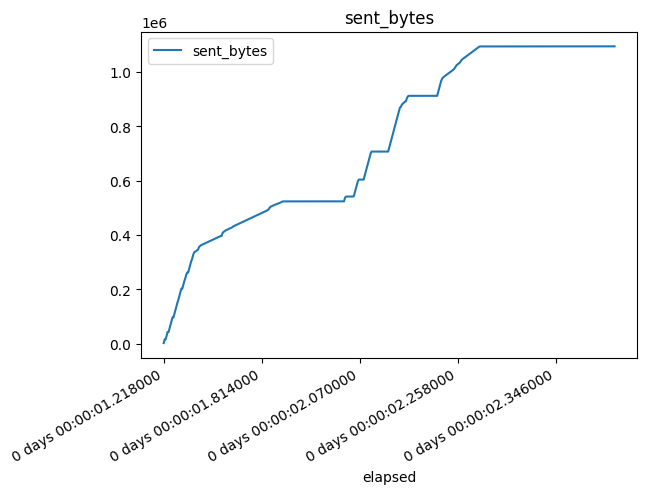

In [149]:
conn[["sent_bytes"]].cumsum().plot()
plt.title("sent_bytes")

<AxesSubplot: xlabel='elapsed'>

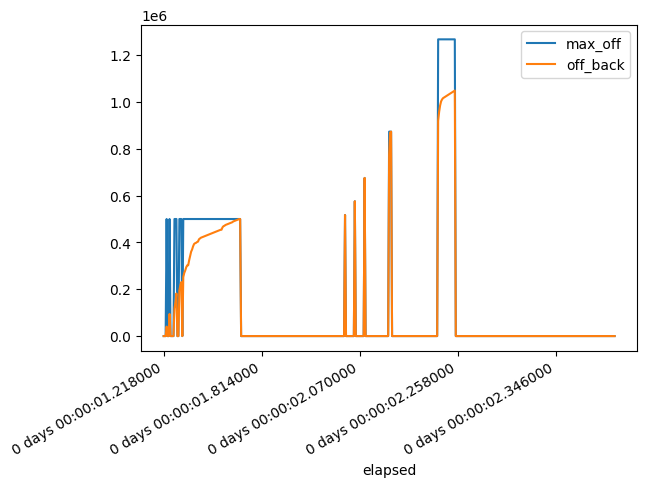

In [150]:
conn[["max_off", "off_back"]].plot()

<AxesSubplot: xlabel='elapsed'>

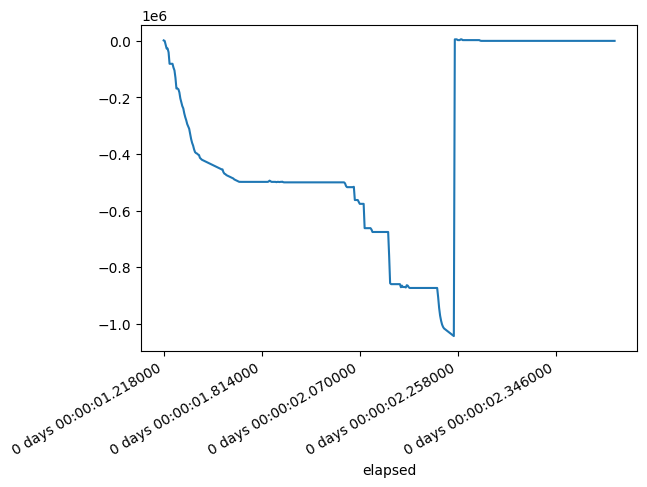

In [151]:
(-conn["stream_written"] + conn["sent_bytes"]).plot()

<AxesSubplot: xlabel='elapsed'>

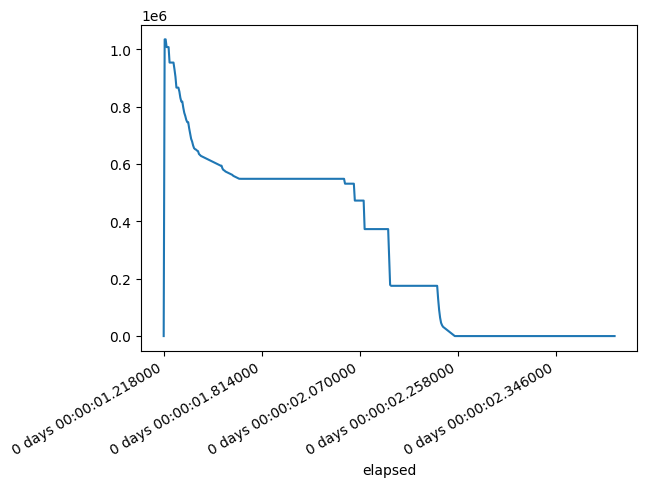

In [152]:
conn["pending"].plot()